In [2]:
%matplotlib inline 
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import matplotlib 
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family = font_name) 


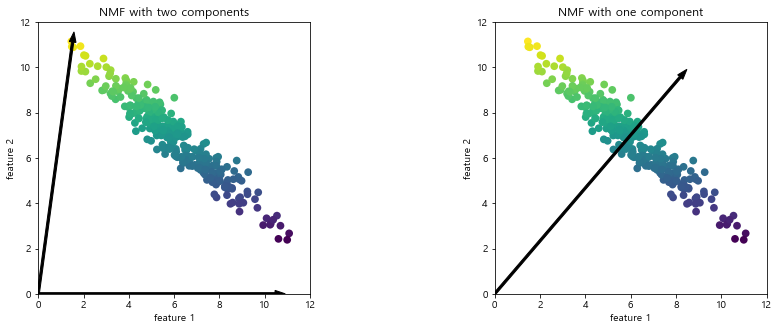

In [4]:
mglearn.plots.plot_nmf_illustration( )

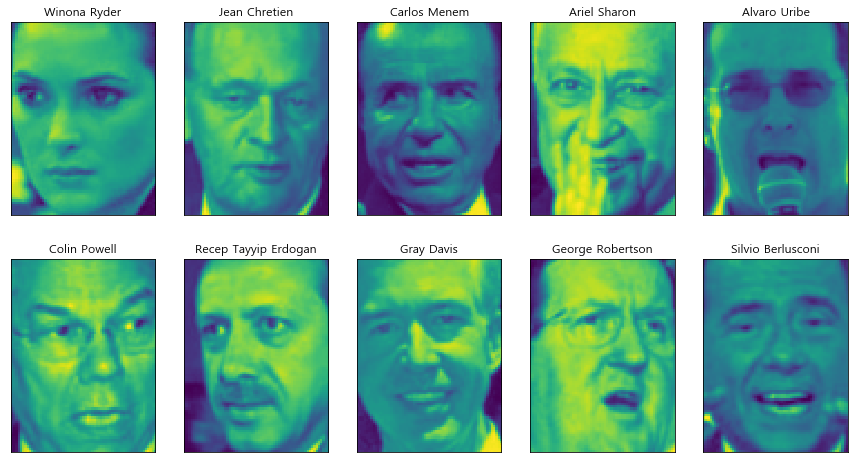

In [6]:
from sklearn.datasets import fetch_lfw_people 
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks' : ( ), 
                                                            'yticks' : ( )}) 
for target, image, ax in zip(people.target, people.images, axes.ravel( )): 
    ax.imshow(image) 
    ax.set_title(people.target_names[target])

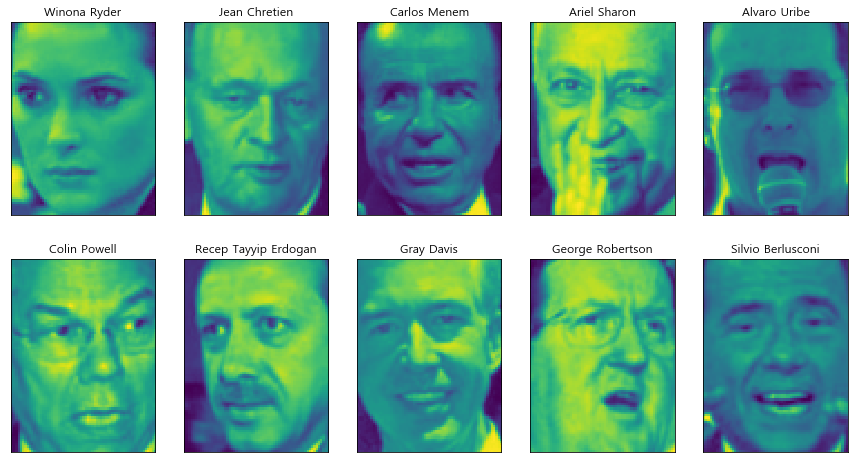

In [7]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 225.


________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.607407, ..., 0.275556],
       ...,
       [0.048889, ..., 0.675556]], dtype=float32), 
array([[0.26963 , ..., 0.305185],
       ...,
       [0.453333, ..., 0.288889]], dtype=float32))
_____________________________________________________nmf_faces - 748.0s, 12.5min


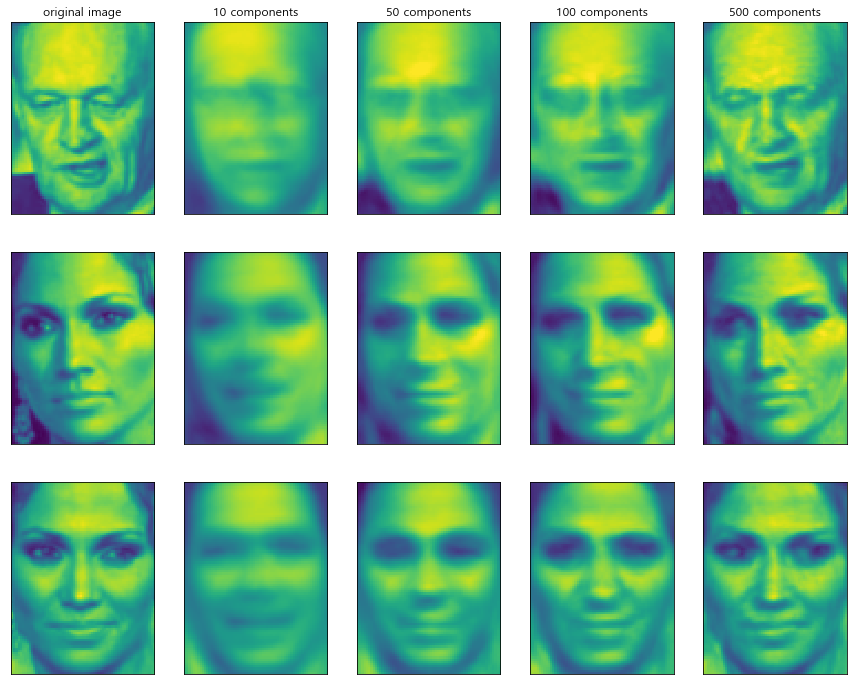

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

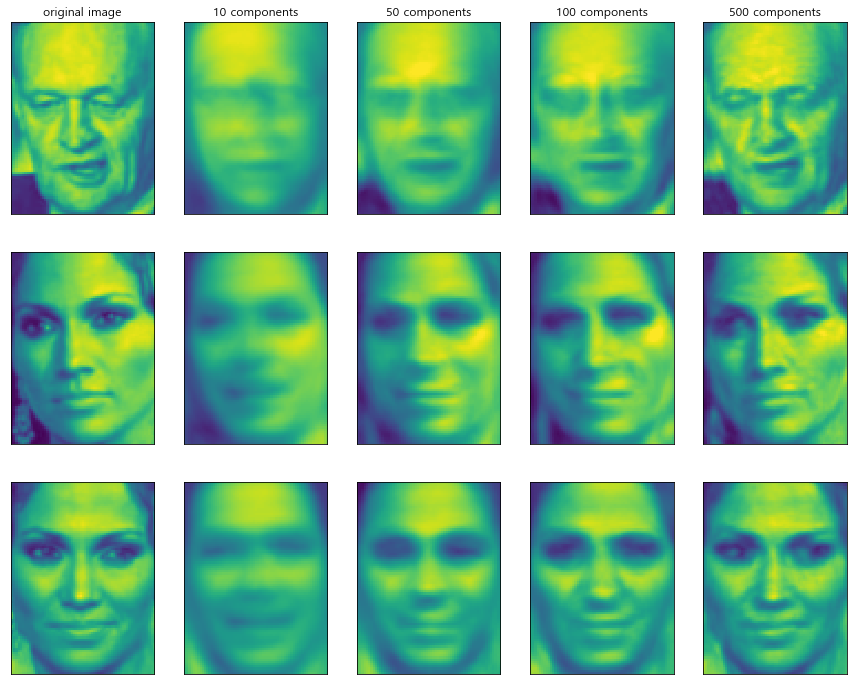

In [9]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

In [ ]:
# NMF는 이미지에서 PCA보다 떨어지는 느낌이 있음.
# 데이터의 패턴을 찾아내는 것에 더 유용함.

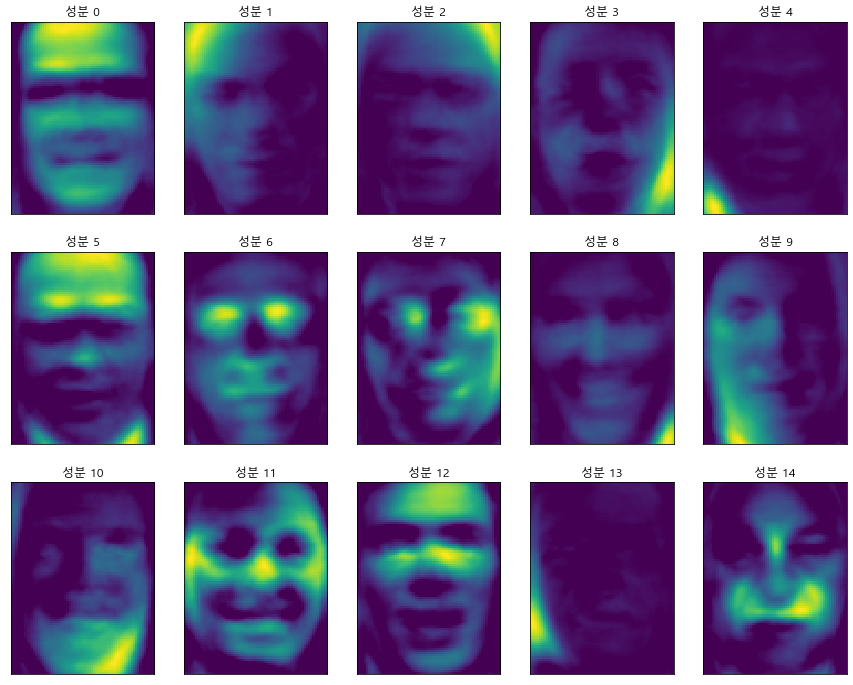

In [10]:
from sklearn.decomposition import NMF 
nmf = NMF(n_components=15, random_state=0) 
nmf.fit(X_train) 
X_train_nmf = nmf.transform(X_train) 
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': ( ), 'yticks': ( )}) 
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel( ))): 
    ax.imshow(component.reshape(image_shape)) 
    ax.set_title("성분 {}".format(i))

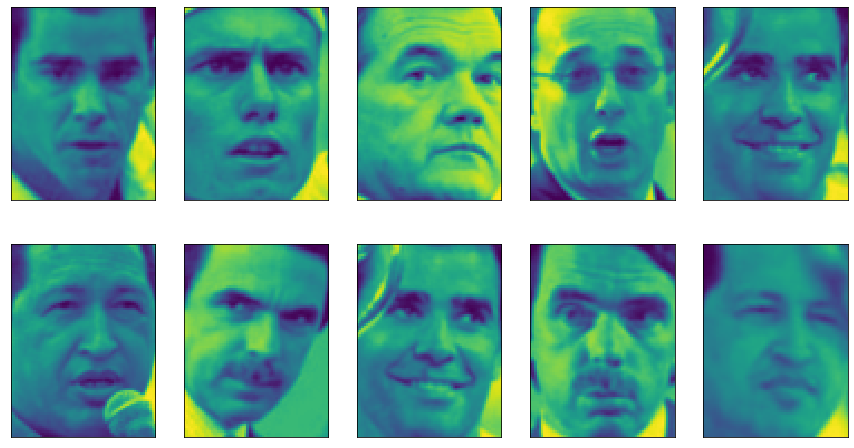

In [11]:
compn = 3 
inds = np.argsort(X_train_nmf[:, compn])[::-1] 
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': ( ), 'yticks': ( )}) 
for i, (ind, ax) in enumerate(zip(inds, axes.ravel( ))): 
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
# NMF 적용 사례 : 소리, 유전파 표현, 텍스트에 적합

Text(0, 0.5, '신호')

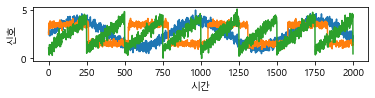

In [12]:
S = mglearn.datasets.make_signals() 
plt.figure(figsize = (6, 1)) 
plt.plot(S, '-') 
plt.xlabel("시간") 
plt.ylabel("신호")


In [13]:
A = np.random.RandomState(0).uniform(size=(100, 3)) 
X = np.dot(S, A.T) 
print("측정 데이터 형태: ", X.shape)

측정 데이터 형태:  (2000, 100)


In [14]:
nmf = NMF(n_components = 3, random_state=42) 
S_ = nmf.fit_transform(X) 
print("복원한 신호 데이터 형태: ", S_.shape)

복원한 신호 데이터 형태:  (2000, 3)


In [16]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3) 
H = pca.fit_transform(X)

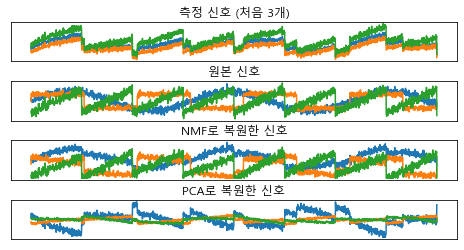

In [18]:
models = [X, S, S_, H] 
names = ['측정 신호 (처음 3개)',  '원본 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호'] 
fig, axes = plt.subplots(4, figsize = (8, 4), gridspec_kw={'hspace' : .5}, 
                         subplot_kw={'xticks': ( ), 'yticks': ( )}) 
for model, name, ax in zip(models, names, axes): 
    ax.set_title(name) 
    ax.plot(model[:, :3], '-')

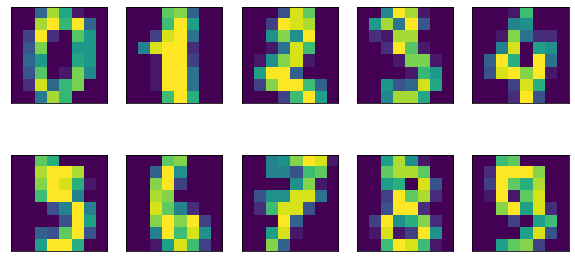

In [19]:
from sklearn.datasets import load_digits 
digits = load_digits( )

fig, axes = plt.subplots(2, 5, figsize = (10, 5), subplot_kw={'xticks': ( ), 'yticks': ( )}) 
for ax, img in zip(axes.ravel( ), digits.images): 
    ax.imshow(img)

Text(0, 0.5, '두 번째 주성분')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


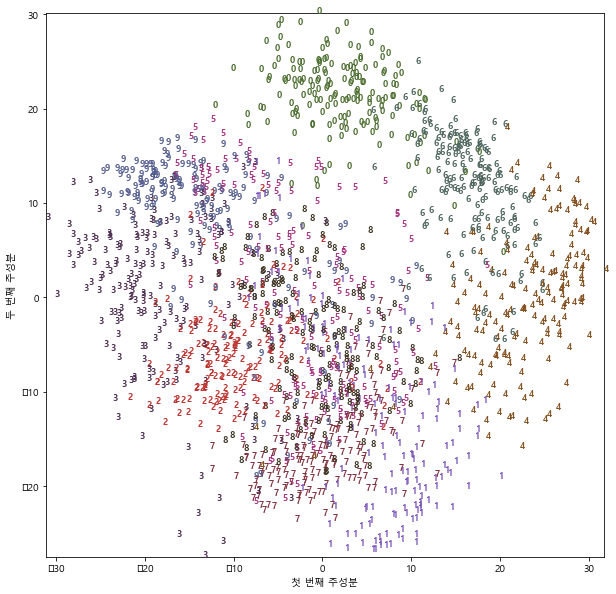

In [20]:
pca =PCA(n_components = 2) 
pca.fit(digits.data)

digits_pca = pca.transform(digits.data) 
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"] 
plt.figure(figsize=(10, 10)) 
plt.xlim(digits_pca[:, 0].min( ), digits_pca[:, 0].max( )) 
plt.ylim(digits_pca[:, 1].min( ), digits_pca[:, 1].max( )) 
for i in range(len(digits.data)): 
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), 
             color = colors[digits.target[i]], 
             fontdict = {'weight': 'bold', 'size' : 9}) 
plt.xlabel("첫 번째 주성분") 
plt.ylabel("두 번째 주성분")

In [21]:
from sklearn.manifold import TSNE 
tsne = TSNE(random_state = 42) 
digits_tsne = tsne.fit_transform(digits.data)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


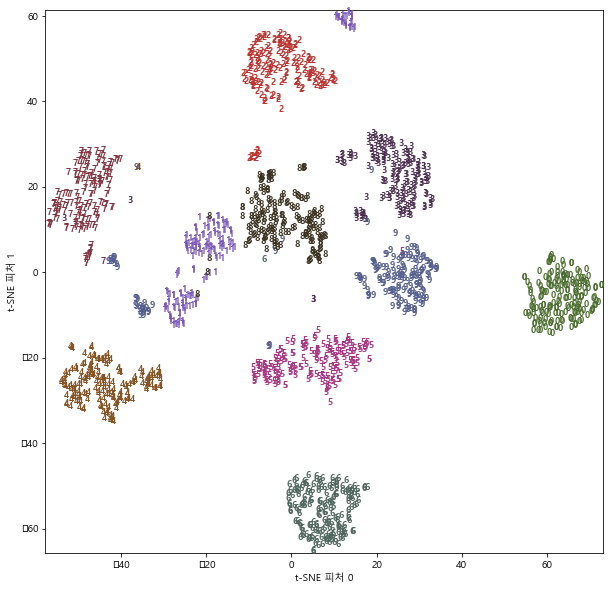

In [22]:
plt.figure(figsize=(10, 10)) 
plt.xlim(digits_tsne[:, 0].min( ), digits_tsne[:, 0].max( ) + 1) 
plt.ylim(digits_tsne[:, 1].min( ), digits_tsne[:, 1].max( ) + 1) 
for i in range(len(digits.data)): 
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), 
             color = colors[digits.target[i]], 
             fontdict = {'weight': 'bold', 'size' : 9}) 
    plt.xlabel("t-SNE 피처 0") 
    plt.ylabel("t-SNE 피처 1")

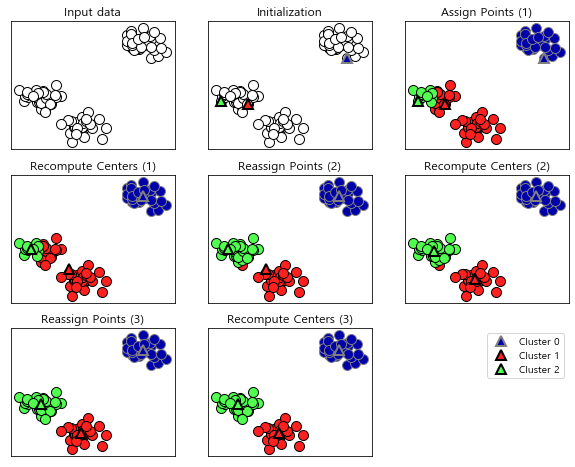

In [23]:
mglearn.plots.plot_kmeans_algorithm( )

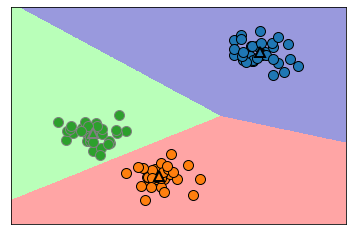

In [24]:
mglearn.plots.plot_kmeans_boundaries( )

In [25]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
X, y = make_blobs(random_state=1) 
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
print("클러스터 레이블: n{}".format(kmeans.labels_))

클러스터 레이블: n[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [29]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


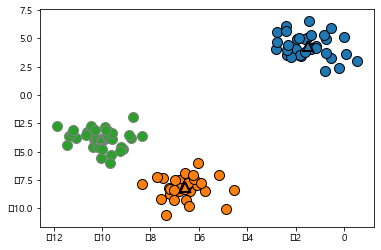

In [30]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter( 
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], 
    markers='^', markeredgewidth=2)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


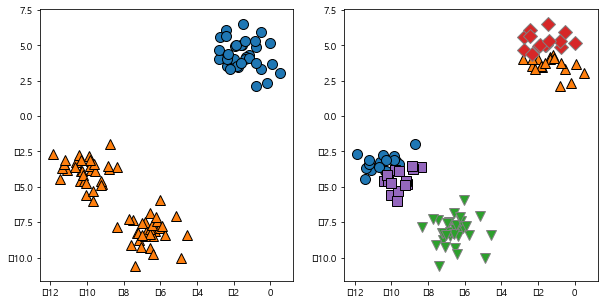

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X) 
assignments = kmeans.labels_ 
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0]) 
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X) 
assignments = kmeans.labels_ 
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

In [ ]:
# kmeams는 스스로 개수를 정확히 구분 못하는 ㅎ한계 있음.
# 

Text(0, 0.5, '피처 1')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


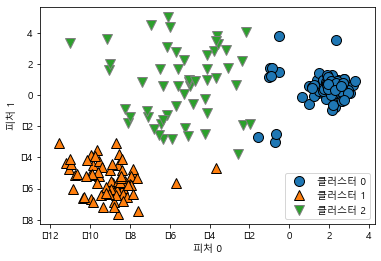

In [32]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], 
                                random_state=170) 
y_pred = KMeans(n_clusters = 3, random_state=0).fit_predict(X_varied) 
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred) 
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best') 
plt.xlabel("피처 0") 
plt.ylabel("피처 1")

Text(0, 0.5, '피처 1')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


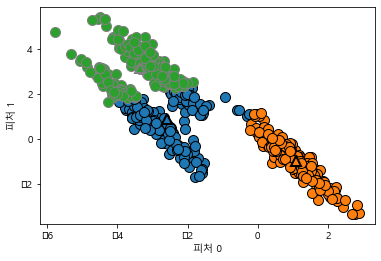

In [33]:
X, y = make_blobs(random_state=170, n_samples=600) 
rng = np.random.RandomState(74) 
transformation = rng.normal(size=(2,2)) 
X = np.dot(X, transformation) 
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X) 
y_pred = kmeans.predict(X) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = 'o') 
mglearn.discrete_scatter( kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=2) 
plt.xlabel("피처 0") 
plt.ylabel("피처 1")

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, 
                                                    stratify=y_people, random_state=42) 
nmf = NMF(n_components=100, random_state=0) 
nmf.fit(X_train) 
kmeans = KMeans(n_clusters=100, random_state=0) 
kmeans.fit(X_train) 
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)] 
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
pca = PCA(n_components = 100, random_state=0)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'pca')

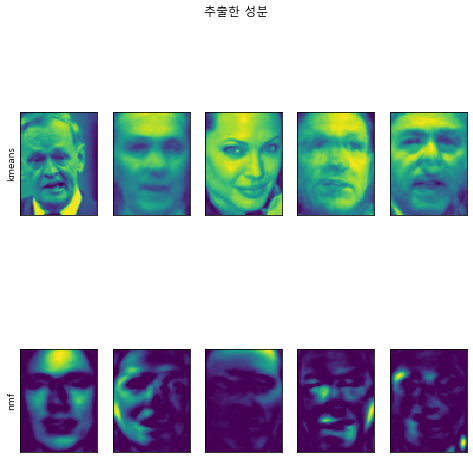

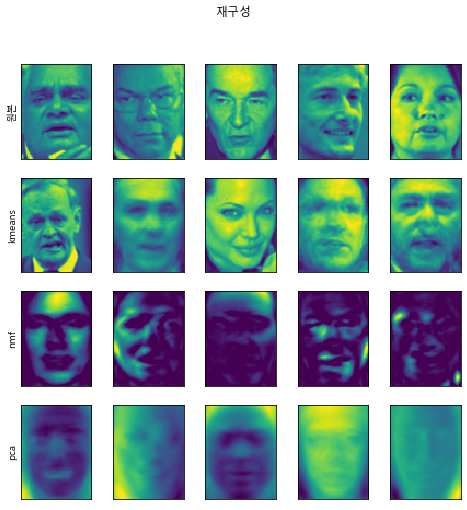

In [39]:
fig, axes= plt.subplots(2, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()}) 
fig.suptitle("추출한 성분") 
for ax, comp_kmeans, comp_nmf in zip( axes.T, kmeans.cluster_centers_, nmf.components_): 
    ax[0].imshow(comp_kmeans.reshape(image_shape)) 
    ax[1].imshow(comp_nmf.reshape(image_shape)) 
axes[0,0].set_ylabel("kmeans") 
axes[1,0].set_ylabel("nmf")

fig, axes= plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()}) 
fig.suptitle("재구성") 
for ax, orig, comp_kmeans, comp_nmf, comp_pca in zip( axes.T, X_test, kmeans.cluster_centers_, nmf.components_, pca.components_): 
    ax[0].imshow(orig.reshape(image_shape)) 
    ax[1].imshow(comp_kmeans.reshape(image_shape)) 
    ax[2].imshow(comp_nmf.reshape(image_shape)) 
    ax[3].imshow(comp_pca.reshape(image_shape))
axes[0,0].set_ylabel("원본") 
axes[1,0].set_ylabel("kmeans") 
axes[2,0].set_ylabel("nmf")
axes[3,0].set_ylabel("pca")


In [37]:
pca = PCA(n_components = 100, random_state=0)
pca.fit(X_train)
# X_reconstructed_pca = 

PCA(copy=True, iterated_power='auto', n_components=100, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)